In [181]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("/absolute/path/to/ARITY-BTT-PROJECT-1")  # <-- put your path here

FileNotFoundError: [Errno 2] No such file or directory: '/absolute/path/to/ARITY-BTT-PROJECT-1'

In [180]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())
df_ios = pd.read_csv(root / "data" / "processed" / "ios.csv", header=0)
df_android = pd.read_csv(root / "data" / "processed" / "android.csv", header=0)
df_ios = df_ios[df_ios['eventSensorDetectionMthd'] == 1]
df_android = df_android[df_android['eventSensorDetectionMthd'] == 1]

FileNotFoundError: [Errno 2] No such file or directory

In [ ]:
print(df_ios.columns.tolist())
print(df_android.columns.tolist())

['init_time', 'eventAction', 'payloadCreation', 'eventStart', 'eventEnd', 'eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventStartLatitude', 'eventStartLongitude', 'eventEndLatitude', 'eventEndLongitude', 'eventSensorDetectionMthd', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'eventSpeedChange', 'memsMedianLateralAccel', 'memsP75LateralAccel', 'memsP95LateralAccel', 'memsMedianHorizontalNorm', 'memsP75HorizontalNorm', 'memsP95HorizontalNorm', 'gpsMedianLateralAccel', 'gpsP75LateralAccel', 'gpsP95LateralAccel', 'bearing_angular_change_per_second', 'gyro_angular_change_per_second', 'bearingAngleChange', 'gyroAngleChange', 'mems_radius', 'gps_radius', 'validity_mean', 'speed_gap', 'aggressive']
['init_time', 'eventAction', 'payloadCreation', 'eventStart', 'eventEnd', 'eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventStartLatitude', 'eventStartLongitude', 'eventEndLatitude', 'eventEndLongitude', 'eventSensor

In [ ]:
# columns to keep (with the earlier-dropped ones removed)
keep_cols = [
    "eventType",
    "eventSampleSpeed",
    "eventDurationSeconds",
    "eventMilesDriven",
    "eventSensorDetectionMthd",
    "eventGPSSignalStrength",
    "eventStartSpeed",
    "eventEndSpeed",
    "memsMedianHorizontalNorm",
    "memsP75HorizontalNorm",
    "memsP95HorizontalNorm",
    "gyro_angular_change_per_second",
    "gyroAngleChange",
    "mems_radius"
]

# keep only these columns
df_ios = df_ios[[c for c in keep_cols if c in df_ios.columns]]
df_android = df_android[[c for c in keep_cols if c in df_android.columns]]

print(df_ios.columns.to_list())
print(df_android.columns.to_list())

['eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventSensorDetectionMthd', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'memsMedianHorizontalNorm', 'memsP75HorizontalNorm', 'memsP95HorizontalNorm', 'gyro_angular_change_per_second', 'gyroAngleChange', 'mems_radius']
['eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventSensorDetectionMthd', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'memsMedianHorizontalNorm', 'memsP75HorizontalNorm', 'memsP95HorizontalNorm', 'gyro_angular_change_per_second', 'gyroAngleChange', 'mems_radius']


In [ ]:
print(df_ios.shape)
print(df_android.shape)

(7068, 14)
(242, 14)


In [ ]:
df_ios['is_ios'] = 1
df_android['is_ios'] = 0
df = pd.concat([df_ios, df_android], ignore_index=True)
df.groupby("is_ios")["memsMedianHorizontalNorm"].describe()

,count,mean,std,min,25%,50%,75%,max
is_ios,,,,,,,,
0,242.0,1.880268,0.729621,0.220557,1.409384,1.831711,2.272722,4.922246
1,7068.0,2.066178,0.784852,0.292356,1.522994,2.011980,2.516937,7.784428


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_66546/1658542548.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


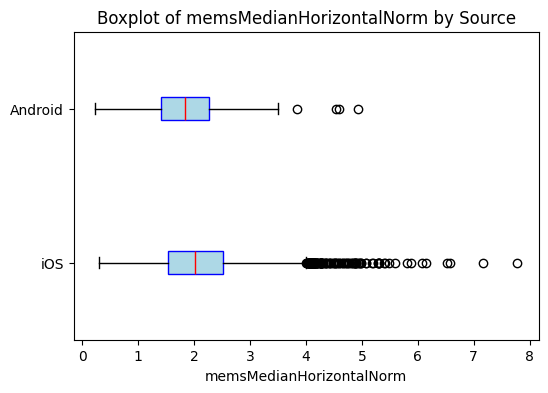

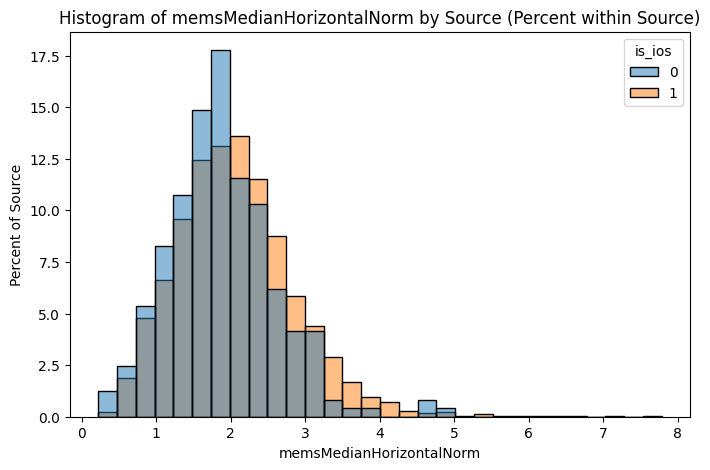

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df_ios['memsMedianHorizontalNorm']
android_data = df_android['memsMedianHorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsMedianHorizontalNorm by Source")
plt.xlabel("memsMedianHorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsMedianHorizontalNorm", 
    hue="is_ios", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsMedianHorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsMedianHorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
print(df_ios.shape[0])
df_ios = df_ios[df_ios['memsMedianHorizontalNorm'] < 7]
print(df_ios.shape[0])

7068
7066


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_66546/2004731546.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


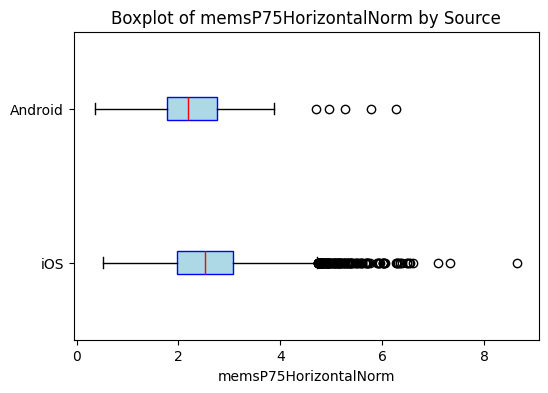

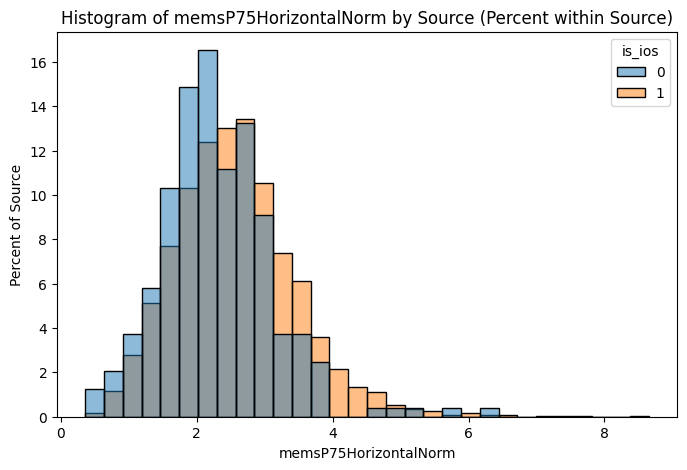

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df_ios['memsP75HorizontalNorm']
android_data = df_android['memsP75HorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP75HorizontalNorm by Source")
plt.xlabel("memsP75HorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP75HorizontalNorm", 
    hue="is_ios", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP75HorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsP75HorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
df_ios = df_ios[df_ios['memsP75HorizontalNorm'] < 8]
df_ios.shape[0]

7065

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_66546/2846662000.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


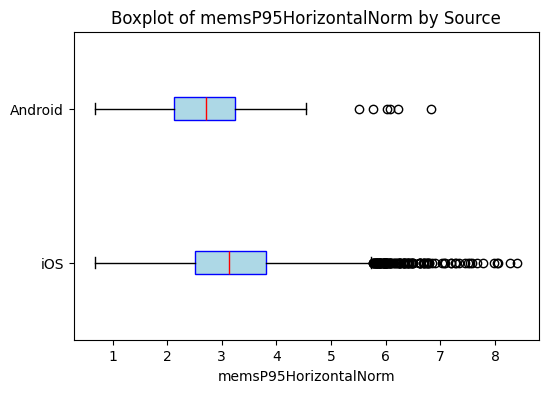

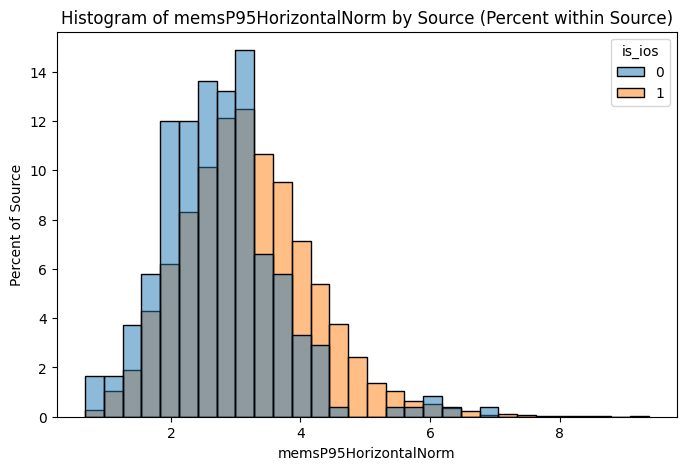

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df_ios['memsP95HorizontalNorm']
android_data = df_android['memsP95HorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP95HorizontalNorm by Source")
plt.xlabel("memsP95HorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP95HorizontalNorm", 
    hue="is_ios", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP95HorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsP95HorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_66546/3053558966.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


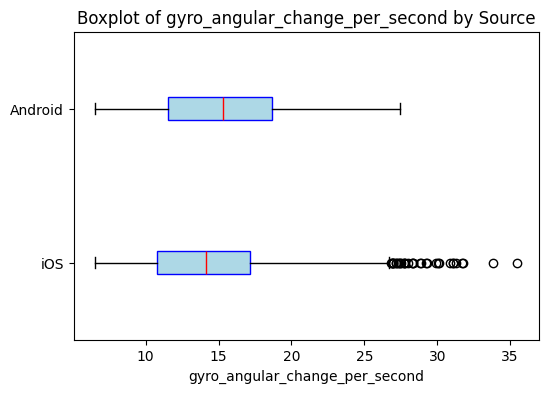

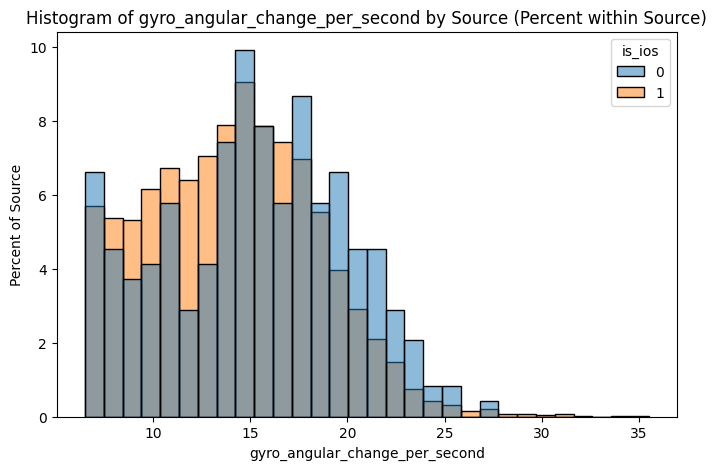

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyro_angular_change_per_second']
android_data = df[df['is_ios'] == 0]['gyro_angular_change_per_second']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyro_angular_change_per_second by Source")
plt.xlabel("gyro_angular_change_per_second")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyro_angular_change_per_second", 
    hue="is_ios", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyro_angular_change_per_second by Source (Percent within Source)")
plt.xlabel("gyro_angular_change_per_second")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
print(df_ios.shape[0])
df_ios = df_ios[df_ios['gyro_angular_change_per_second'] < 33]
print(df_ios.shape[0])

7065
7063


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_66546/1861655693.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


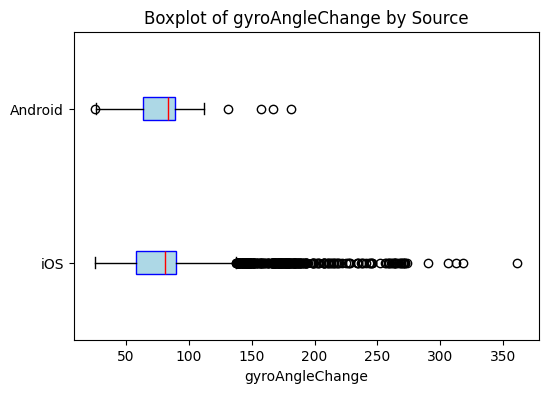

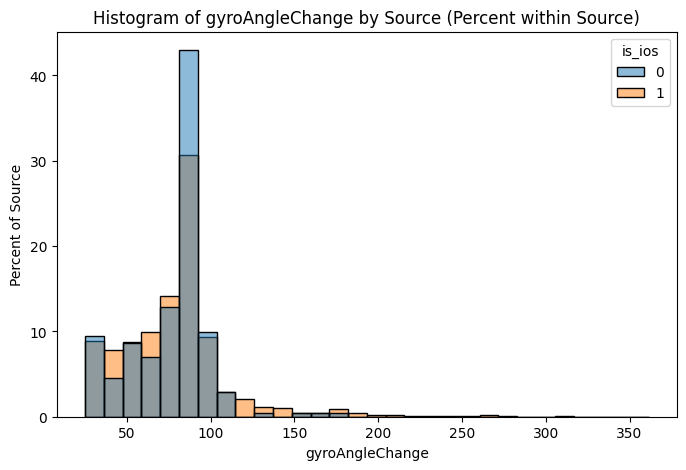

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df_ios['gyroAngleChange']
android_data = df_android['gyroAngleChange']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyroAngleChange by Source")
plt.xlabel("gyroAngleChange")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyroAngleChange", 
    hue="is_ios", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyroAngleChange by Source (Percent within Source)")
plt.xlabel("gyroAngleChange")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
print(df_ios.shape[0])
df_ios = df_ios[df_ios['gyroAngleChange'] < 270]
print(df_ios.shape[0])

7063
7052


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_66546/3342950174.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


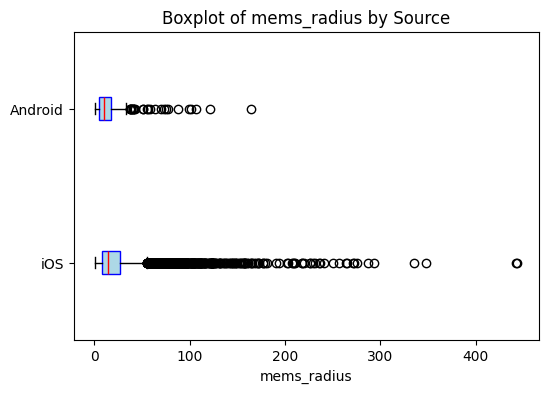

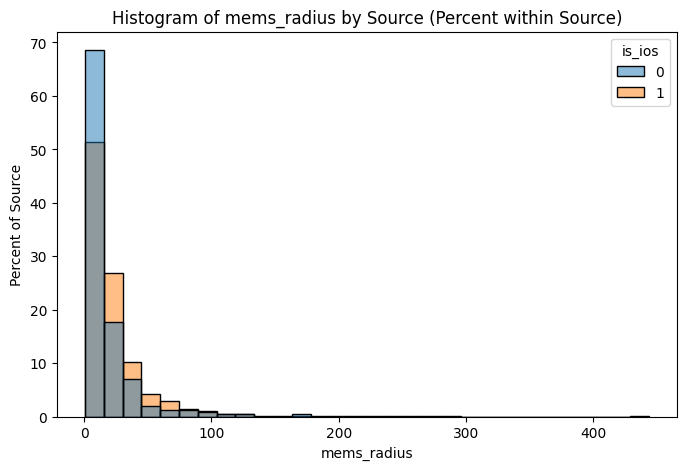

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['mems_radius']
android_data = df[df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of mems_radius by Source")
plt.xlabel("mems_radius")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="mems_radius", 
    hue="is_ios", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Percent within Source)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
df_ios['mems_radius'].describe()

count    7052.000000
mean       23.199043
std        27.778132
min         0.993186
25%         8.150963
50%        15.051963
75%        27.051789
max       443.719570
Name: mems_radius, dtype: float64

In [ ]:
df_android['mems_radius'].describe()

count    242.000000
mean      16.750315
std       21.069934
min        1.149770
25%        5.332154
50%       10.064077
75%       17.724259
max      164.370880
Name: mems_radius, dtype: float64

In [ ]:
df[df['mems_radius'] > 1000]

,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius,is_ios


In [ ]:
# find all infinite values in mems_radius
df[np.isinf(df['mems_radius'])]

,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius,is_ios


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_66546/3924250392.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


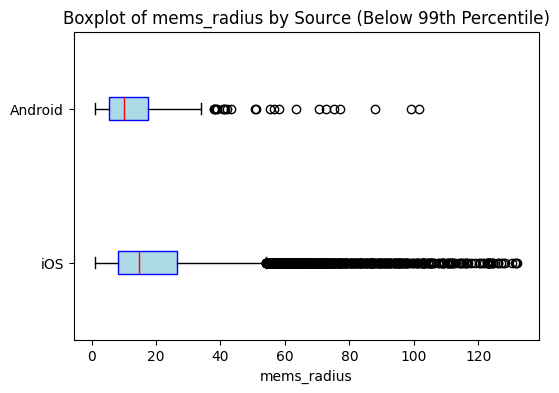

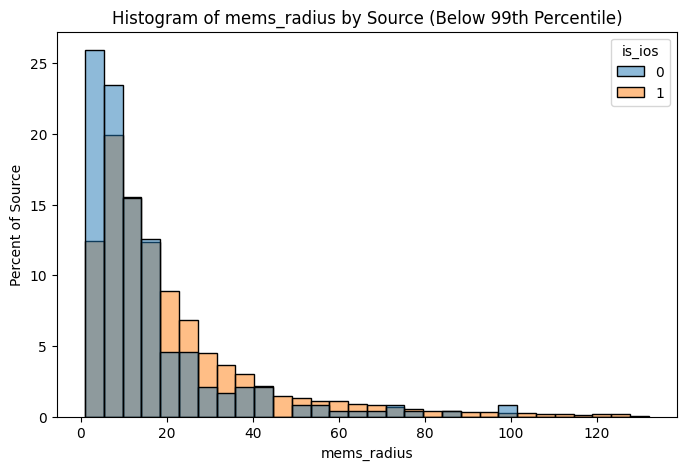

Original size: 7310
New size: 7220
Difference: 90


In [ ]:
# Compute 95th percentile threshold
ios_subset = df_ios
android_subset = df_android

Q_ios = ios_subset['mems_radius'].quantile(0.99)
Q_android = android_subset['mems_radius'].quantile(0.99)

filtered_ios = ios_subset[ios_subset['mems_radius'] <= Q_ios].copy()
filtered_android = android_subset[android_subset['mems_radius'] <= Q_android].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

ios_radius = filtered_ios['mems_radius']
android_radius = filtered_android['mems_radius']
new_df = pd.concat([filtered_ios, filtered_android], ignore_index=True)

plt.boxplot(
    [ios_radius, android_radius],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 99th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="is_ios", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 99th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_66546/1766791970.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


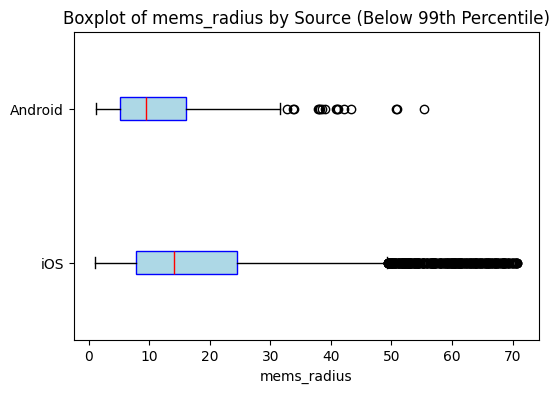

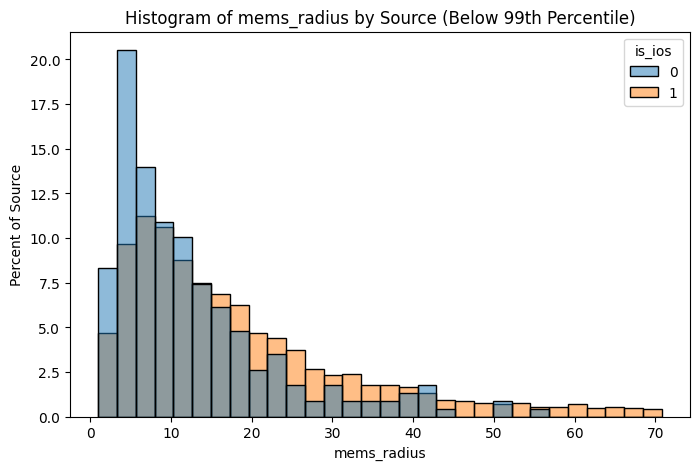

Original size: 7310
New size: 6928
Difference: 382


In [ ]:
# Compute 95th percentile threshold
ios_subset = df_ios
android_subset = df_android

Q_ios = ios_subset['mems_radius'].quantile(0.95)
Q_android = android_subset['mems_radius'].quantile(0.95)

filtered_ios = ios_subset[ios_subset['mems_radius'] <= Q_ios].copy()
filtered_android = android_subset[android_subset['mems_radius'] <= Q_android].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

ios_radius = filtered_ios['mems_radius']
android_radius = filtered_android['mems_radius']
new_df = pd.concat([filtered_ios, filtered_android], ignore_index=True)

plt.boxplot(
    [ios_radius, android_radius],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 99th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="is_ios", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 99th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")


In [ ]:
# Compute 95th percentile threshold
Q_ios = df_ios['mems_radius'].quantile(0.95)
Q_android = df_android['mems_radius'].quantile(0.95)

df_ios = df_ios[df_ios['mems_radius'] <= Q_ios]
df_android = df_android[df_android['mems_radius'] <= Q_android]

print(df_ios.shape)
print(df_android.shape)



(6364, 15)
(217, 15)


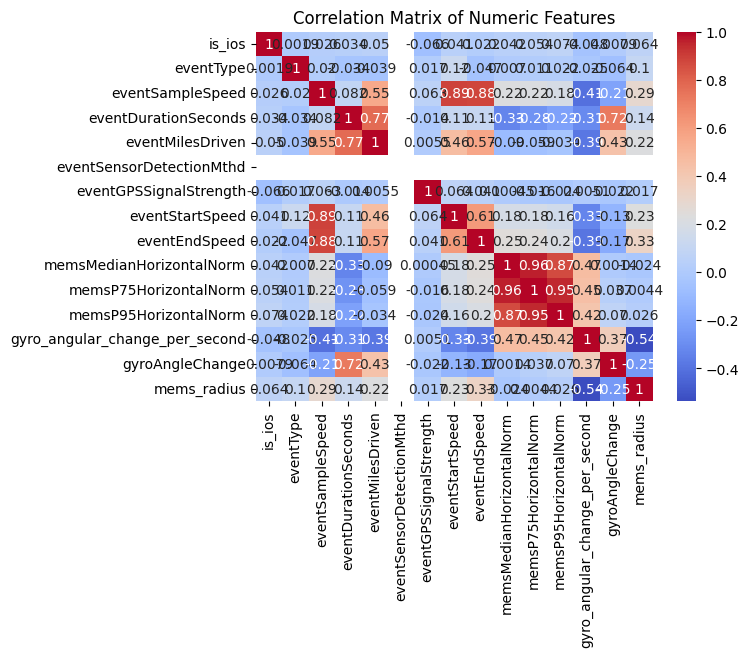

In [ ]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [ ]:
df.drop(columns=["memsP75HorizontalNorm", "memsP95HorizontalNorm"], inplace=True)

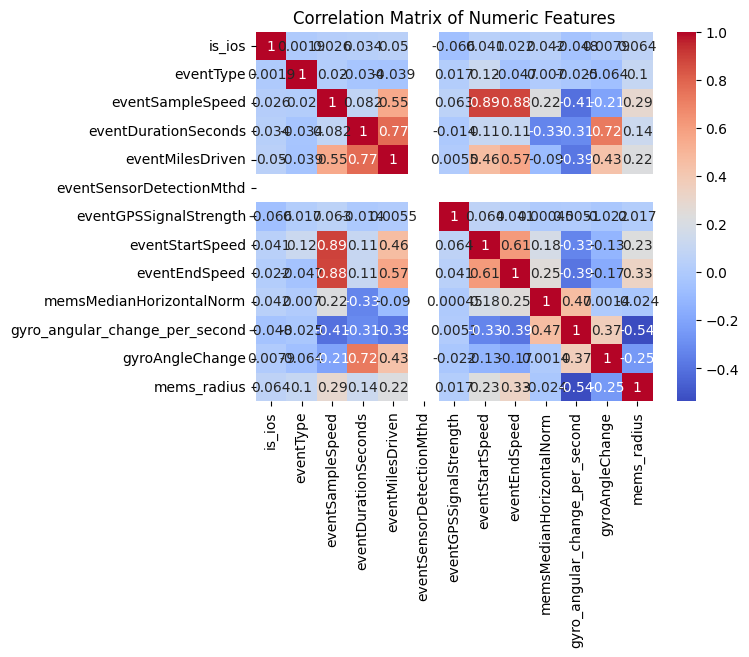

In [ ]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [ ]:
df.to_csv(root / "data" / "processed" / "merged"/ "state1_clean.csv", index=False) 